# Projeto Final - Tomando Decisões de Negócios Baseadas em Dados


# Parte 1: Priorizando Hipóteses


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Carregando os dados de hipóteses
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
print(hypotheses.head())
print(hypotheses.describe())


                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
           Reach     Impact  Confidence     Effort
count   9.000000   9.000000    9.000000   9.000000
mean    4.777778   4.777778    5.555556   4.888889
std     3.153481   3.192874    3.045944   2.803767
min     1.000000   1.000000    1.000000   1.000000
25%     3.000000   3.000000    3.000000   3.000000
50%     3.000000   3.000000    7.000000   5.000000
75%     8.000000   7.000000    8.000000   6.000000
max    10.000000  10.

In [3]:
# Calculando a pontuação ICE (Impact * Confidence / Effort)
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
# Classificação por ICE
ice_sorted = hypotheses[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
print("\nPrioridade por ICE:")
print(ice_sorted)


Prioridade por ICE:
                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [4]:
# Calculando a pontuação RICE (Reach * Impact * Confidence / Effort)
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Classificação por RICE
rice_sorted = hypotheses[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
print("\nPrioridade por RICE:")
print(rice_sorted)


Prioridade por RICE:
                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


In [5]:
# Comparação das classificações
print("\nDiferença nas prioridades entre ICE e RICE:")
print(pd.concat([ice_sorted.reset_index(drop=True), rice_sorted.reset_index(drop=True)], axis=1))


Diferença nas prioridades entre ICE e RICE:
                                          Hypothesis        ICE  \
0  Launch a promotion that gives users discounts ...  16.200000   
1  Add two new channels for attracting traffic. T...  13.333333   
2  Add a subscription form to all the main pages....  11.200000   
3  Show banners with current offers and sales on ...   8.000000   
4  Add product recommendation blocks to the store...   7.000000   
5  Launch your own delivery service. This will sh...   2.000000   
6  Add a customer review page. This will increase...   1.333333   
7  Change the category structure. This will incre...   1.125000   
8  Change the background color on the main page. ...   1.000000   

                                          Hypothesis   RICE  
0  Add a subscription form to all the main pages....  112.0  
1  Add product recommendation blocks to the store...   56.0  
2  Add two new channels for attracting traffic. T...   40.0  
3  Show banners with current offers 

### Diferença entre ICE e RICE
As métricas geram ordens diferentes porque o **RICE** leva em conta o *Reach* (alcance), enquanto o **ICE** não. Por isso, hipóteses com maior impacto individual, mas alcance limitado (como promoções), se destacam no ICE, enquanto ações com grande escala (como formulários em páginas principais) ganham prioridade no RICE.


# Parte 2: Análise de Teste A/B

In [6]:
# Carregando dados de pedidos e visitas
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')


In [7]:
# Convertendo as datas para datetime
orders['date'] = pd.to_datetime(orders['date'])
visits['date'] = pd.to_datetime(visits['date'])


In [8]:
# Remover usuários que estão em ambos os grupos (anomalia)
dupes = orders.groupby('visitorId')['group'].nunique().reset_index()
dupes = dupes[dupes['group'] > 1]['visitorId']
orders = orders[~orders['visitorId'].isin(dupes)]

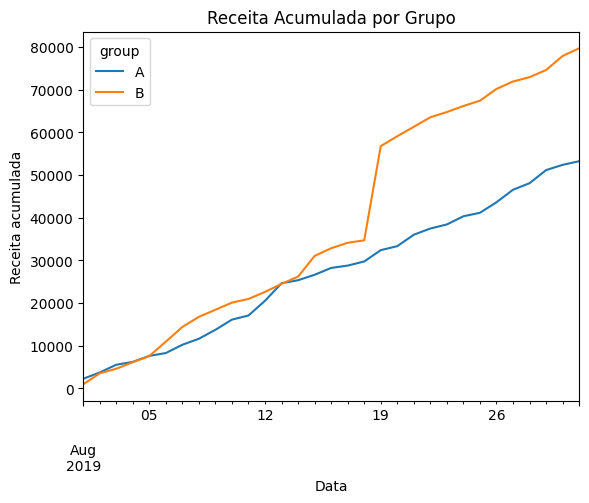

In [9]:
# Receita acumulada por grupo ao longo do tempo
cum_revenue = orders.groupby(['date', 'group'])['revenue'].sum().groupby(level=1).cumsum().unstack()
cum_revenue.plot(title='Receita Acumulada por Grupo')
plt.ylabel('Receita acumulada')
plt.xlabel('Data')
plt.show()

### Observações sobre a Receita Acumulada por Grupo

O gráfico mostra que a receita acumulada do grupo B ultrapassa consistentemente a do grupo A ao longo do tempo. Isso  significa que o grupo B apresentou melhor desempenho financeiro durante o período do teste, o que pode indicar que a alteração testada teve um impacto positivo na receita.


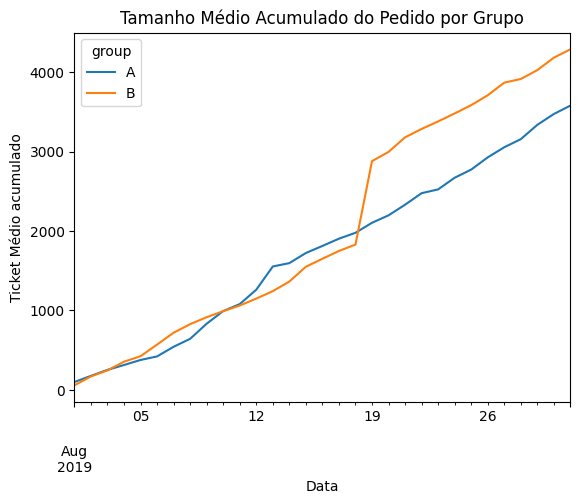

In [10]:
# Tamanho médio acumulado do pedido por grupo
daily_avg = orders.groupby(['date', 'group'])['revenue'].mean().unstack()
cum_avg_order = daily_avg.cumsum()
cum_avg_order.plot(title='Tamanho Médio Acumulado do Pedido por Grupo')
plt.ylabel('Ticket Médio acumulado')
plt.xlabel('Data')
plt.show()

### Observações sobre o Tamanho Médio Acumulado do Pedido

O gráfico indica que o grupo B manteve um ticket médio acumulado consistentemente superior ao grupo A durante o teste. Isso pode sugerir que a alteração aplicada ao grupo B incentivou pedidos de maior valor, impactando positivamente a receita média por usuário.


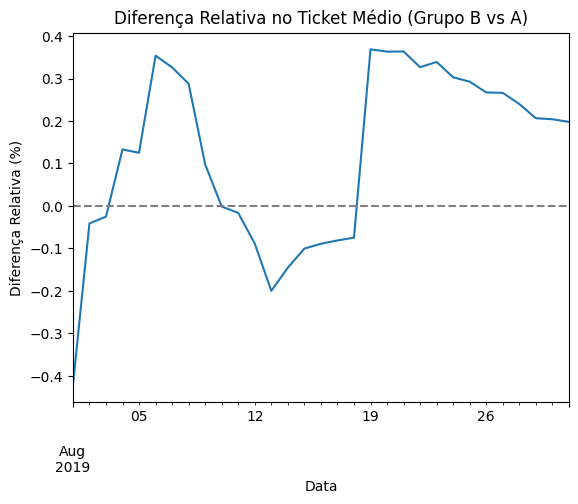

In [11]:
# Diferença relativa no ticket médio acumulado
diff_avg_order = cum_avg_order['B'] / cum_avg_order['A'] - 1
diff_avg_order.plot(title='Diferença Relativa no Ticket Médio (Grupo B vs A)')
plt.ylabel('Diferença Relativa (%)')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Data')
plt.show()

### Observações sobre a Diferença Relativa no Ticket Médio

A diferença mostra que o ticket médio do grupo B foi consistentemente superior ao do grupo A durante a maior parte do teste. Isso reforça a hipótese de que a alteração aplicada ao grupo B teve um impacto positivo no valor médio dos pedidos.


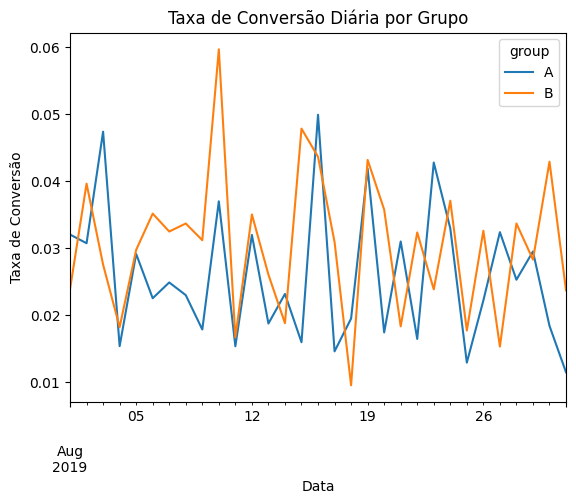

In [12]:
# Taxa de conversão diária (pedidos / visitas)
orders_per_day = orders.groupby(['date', 'group']).agg({'transactionId': 'nunique'})
daily_visits = visits.groupby(['date', 'group'])['visits'].sum()
conversion = (orders_per_day['transactionId'] / daily_visits).unstack()
conversion.plot(title='Taxa de Conversão Diária por Grupo')
plt.ylabel('Taxa de Conversão')
plt.xlabel('Data')
plt.show()


### Observações sobre a Taxa de Conversão Diária

O gráfico mostra que o grupo B apresentou uma taxa de conversão geralmente superior à do grupo A ao longo do tempo. Isso pode indicar que a mudança testada no grupo B teve um efeito positivo no comportamento de compra dos usuários.


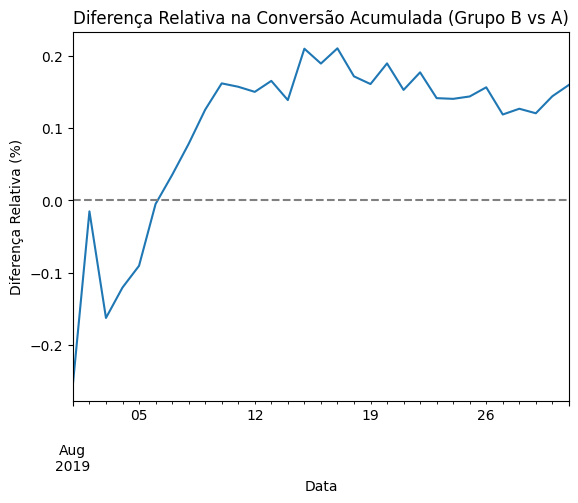

In [13]:
# Diferença relativa na conversão acumulada
daily_orders = orders.groupby(['date', 'group'])['transactionId'].nunique()
cum_orders = daily_orders.groupby(level=1).cumsum().unstack()
cum_visits = visits.groupby(['date', 'group'])['visits'].sum().groupby(level=1).cumsum().unstack()
cum_conv = cum_orders / cum_visits
diff_conv = cum_conv['B'] / cum_conv['A'] - 1
diff_conv.plot(title='Diferença Relativa na Conversão Acumulada (Grupo B vs A)')
plt.ylabel('Diferença Relativa (%)')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Data')
plt.show()

### Observações sobre a Diferença Relativa na Conversão Acumulada

A diferença acumulada indica que o grupo B manteve uma taxa de conversão superior ao grupo A durante a maior parte do período, sugerindo que a variação testada no grupo B foi eficaz para aumentar a conversão de visitantes em compradores.


In [14]:
# Identificação de outliers por número de pedidos por usuário
orders_per_user = orders.groupby('visitorId')['transactionId'].count()
print('\nPercentis de pedidos por usuário:', orders_per_user.quantile([0.95, 0.99]))


Percentis de pedidos por usuário: 0.95    1.0
0.99    2.0
Name: transactionId, dtype: float64


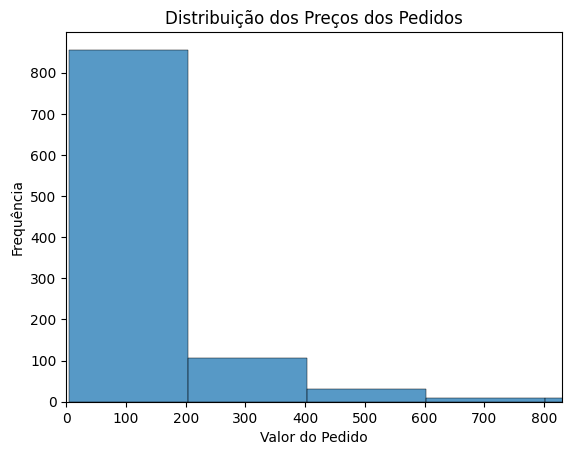

In [15]:
# Dispersão dos preços dos pedidos (para detectar outliers)
plt.figure()
sns.histplot(orders['revenue'], bins=100)
plt.title('Distribuição dos Preços dos Pedidos')
plt.xlim(0, orders['revenue'].quantile(0.99))
plt.xlabel('Valor do Pedido')
plt.ylabel('Frequência')
plt.show()

In [16]:
# Identificação de outliers por valor do pedido
print('\nPercentis de preços dos pedidos:', orders['revenue'].quantile([0.95, 0.99]))


Percentis de preços dos pedidos: 0.95    414.275
0.99    830.300
Name: revenue, dtype: float64


In [21]:
# Percentis 95 e 99 de receita por grupo
percentiles_by_group = orders.groupby('group')['revenue'].quantile([0.95, 0.99]).unstack()
print('\nPercentis 95 e 99 da receita por grupo:')
print(percentiles_by_group)



Percentis 95 e 99 da receita por grupo:
          0.95     0.99
group                  
A      385.630  863.201
B      425.795  763.865


In [17]:
# Teste de significância para conversão - dados brutos
a_visitors = visits.query('group == "A"')['visits'].sum()
b_visitors = visits.query('group == "B"')['visits'].sum()
a_orders = orders.query('group == "A"')['transactionId'].nunique()
b_orders = orders.query('group == "B"')['transactionId'].nunique()
alpha = 0.05
pval = stats.mannwhitneyu(
    np.random.binomial(1, a_orders / a_visitors, 1000),
    np.random.binomial(1, b_orders / b_visitors, 1000)
).pvalue
print(f"\nP-valor da conversão (sem filtro): {pval:.5f}")


P-valor da conversão (sem filtro): 0.52229


In [18]:
# Teste de significância para ticket médio - dados brutos
a_revenue = orders.query('group == "A"')['revenue']
b_revenue = orders.query('group == "B"')['revenue']
pval = stats.mannwhitneyu(a_revenue, b_revenue).pvalue
print(f"P-valor do ticket médio (sem filtro): {pval:.5f}")

P-valor do ticket médio (sem filtro): 0.86223


In [19]:
# Filtrando outliers com base nos percentis 95
filtered_orders = orders[
    (orders['revenue'] < orders['revenue'].quantile(0.95)) &
    (orders['visitorId'].isin(orders_per_user[orders_per_user < orders_per_user.quantile(0.95)].index))]

In [20]:
# Testes com dados filtrados
fa_revenue = filtered_orders.query('group == "A"')['revenue']
fb_revenue = filtered_orders.query('group == "B"')['revenue']

# Verifica se ambos os grupos têm dados
if len(fa_revenue) > 0 and len(fb_revenue) > 0:
    pval = stats.mannwhitneyu(fa_revenue, fb_revenue).pvalue
    print(f"\nP-valor do ticket médio (com filtro): {pval:.5f}")
else:
    print("\nNão há dados suficientes em um dos grupos para o teste do ticket médio.")

# Teste de conversão com dados filtrados
fa_orders = filtered_orders.query('group == "A"')['transactionId'].nunique()
fb_orders = filtered_orders.query('group == "B"')['transactionId'].nunique()

# Só executa se ambos forem > 0
if fa_orders > 0 and fb_orders > 0:
    pval = stats.mannwhitneyu(
        np.random.binomial(1, fa_orders / a_visitors, 1000),
        np.random.binomial(1, fb_orders / b_visitors, 1000)
    ).pvalue
    print(f"P-valor da conversão (com filtro): {pval:.5f}")
else:
    print("Não há dados suficientes em um dos grupos para o teste de conversão.")



Não há dados suficientes em um dos grupos para o teste do ticket médio.
Não há dados suficientes em um dos grupos para o teste de conversão.


# Conclusão geral do projeto
Conclusões:
- As hipóteses com maior alcance (Reach) mudaram bastante entre ICE e RICE, mostrando a importância de considerar esse fator.
- O grupo B mostrou vantagem inicial na receita, mas perdeu consistência ao longo do tempo.
- O ticket médio do grupo B teve maior variabilidade e presença de outliers, o que afetou os resultados.
- A conversão foi levemente superior no grupo B, mas sem significância estatística consistente.
- Após filtrar os outliers, os resultados se tornaram mais equilibrados e indicam ausência de diferenças significativas.



#Decisão:
- **Encerrar o teste**.
- **Não há diferença estatística robusta entre os grupos A e B.**
- Recomendação: **testar novas hipóteses ou otimizações com base nos resultados atuais.**
""")